In this file we are attempting to use data from other stocks to predict the price changes found within the MSFT stock. To calculate we are using multiple metrics. Hopefully once this process can be applied to a single stock then it can be used on the other 500 SNP stocks.

In [117]:
import yfinance as yf
import pandas as pd

# msft = yf.Ticker("MSFT")
# msftHist = msft.history(period="max")
# msftHist.to_json("msftStockData.json")
msftHist = pd.read_json('msftStockData.json')
msftHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1986-03-13 05:00:00,0.055121,0.063227,0.055121,0.060524,1031788800,0.0,0.0
1986-03-14 05:00:00,0.060524,0.063767,0.060524,0.062686,308160000,0.0,0.0
1986-03-17 05:00:00,0.062686,0.064307,0.062686,0.063767,133171200,0.0,0.0
1986-03-18 05:00:00,0.063767,0.064307,0.061605,0.062145,67766400,0.0,0.0
1986-03-19 05:00:00,0.062145,0.062686,0.060524,0.061065,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-03 04:00:00,326.000000,329.880005,325.950012,326.660004,18253700,0.0,0.0
2023-08-04 04:00:00,331.880005,335.140015,327.239990,327.779999,23727700,0.0,0.0
2023-08-07 04:00:00,328.369995,331.109985,327.519989,330.109985,17741500,0.0,0.0
2023-08-08 04:00:00,326.959991,328.750000,323.000000,326.049988,22301200,0.0,0.0


^^ Here we import the required libraries and access the financial data from the yfinance library and store it in a json file to prevent making the request every time. The lines which access yfinance are commented to prevent running every time.

In [118]:
otherStock = yf.Ticker('AAPL')
# otherHist = otherStock.history(period="max")
# otherHist.to_json("otherHist.json")
otherHist = pd.read_json('otherHist.json')
otherHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1980-12-12 05:00:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0
1980-12-15 05:00:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0
1980-12-16 05:00:00,0.087894,0.087894,0.087461,0.087461,105728000,0.0,0
1980-12-17 05:00:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0
1980-12-18 05:00:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0
...,...,...,...,...,...,...,...
2023-07-24 04:00:00,193.410004,194.910004,192.250000,192.750000,45377800,0.0,0
2023-07-25 04:00:00,193.330002,194.440002,192.919998,193.619995,37283200,0.0,0
2023-07-26 04:00:00,193.669998,195.639999,193.320007,194.500000,47471900,0.0,0
2023-07-27 04:00:00,196.020004,197.199997,192.550003,193.220001,47460200,0.0,0


^^ This just applies the same process of getting the financial data but for a different example stock and again saving it into a file

In [119]:
temp = msftHist.copy()
temp["Target"] = None

# For each row determine if the change is positive or negative
for i in range(0, len(temp)):
    if(temp.iloc[i].Close > temp.iloc[i].Open):
        temp.iloc[i, 7] = 1.0
    else:
        temp.iloc[i, 7] = 0.0
temp = temp.drop(columns=['Dividends']) 
temp = temp.drop(columns=['Stock Splits']) 
temp


,Open,High,Low,Close,Volume,Target
1986-03-13 05:00:00,0.055121,0.063227,0.055121,0.060524,1031788800,1.0
1986-03-14 05:00:00,0.060524,0.063767,0.060524,0.062686,308160000,1.0
1986-03-17 05:00:00,0.062686,0.064307,0.062686,0.063767,133171200,1.0
1986-03-18 05:00:00,0.063767,0.064307,0.061605,0.062145,67766400,0.0
1986-03-19 05:00:00,0.062145,0.062686,0.060524,0.061065,47894400,0.0
...,...,...,...,...,...,...
2023-08-03 04:00:00,326.000000,329.880005,325.950012,326.660004,18253700,1.0
2023-08-04 04:00:00,331.880005,335.140015,327.239990,327.779999,23727700,0.0
2023-08-07 04:00:00,328.369995,331.109985,327.519989,330.109985,17741500,1.0
2023-08-08 04:00:00,326.959991,328.750000,323.000000,326.049988,22301200,0.0


^^ This creates a target column which states whether the value of the stock increased or decreased that day.

In [ ]:
otherHist = otherHist[otherHist.index >= msftHist.index[0]]
otherHist['Target'] = temp['Target']
otherHist['Target'] = otherHist['Target'].shift(-1)
otherHist = otherHist.drop(columns=['Dividends']) 
otherHist = otherHist.drop(columns=['Stock Splits']) 

^^ This ensures that the dates for the price data align for the 2 stocks. It also places and shifts the target column onto the other stock so that the other stock price data can be used to predict the changes in MSFT.

In [121]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

predictCols = ['Open', 'High', 'Low', 'Close', 'Volume']
rf = RandomForestClassifier()
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)
train = otherHist.iloc[:-100]
test = otherHist.iloc[-100:]
model.fit(train[predictCols], train["Target"].astype('int'))

RandomForestClassifier(min_samples_split=200, random_state=1)

In [122]:
from sklearn.metrics import precision_score
predictions = model.predict(test[predictCols])
preds = pd.Series(predictions, index = test.index)
precScore = precision_score(test["Target"].iloc[:-1].astype('int'), preds.iloc[:-1])
precScore

0.7692307692307693

^^ This uses a random forest classifier to train the model to predict the change in MSFT stock price based on the price data of the other stock. It also splits the data into both training and testing datasets.
The percentage of correct guesses are then returned.

In [123]:
def csvConversion(filePath):
    otherHist = pd.read_csv('fiveYearData/'+ filePath)
    newDF = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
    newDF.High = otherHist.high
    newDF.Open = otherHist.open
    newDF.Low = otherHist.low
    newDF.Close = otherHist.close
    newDF.Volume = otherHist.volume
    newDF.index = otherHist.date
    return newDF

^^ Fetches the relevant data for each stock and convert it into a readable dataframe

In [124]:
msftHist = csvConversion('MSFT_data.csv')

def calculatePrecisionScore(otherHistPath):
    otherHist = csvConversion(otherHistPath)

    temp = msftHist.copy()
    temp["Target"] = None

    # Calculates daily change
    for i in range(0, len(temp)):
        if(temp.iloc[i].Close > temp.iloc[i].Open):
            temp.iloc[i, 5] = 1.0
        else:
            temp.iloc[i, 5] = 0.0

    # Appends and moves daily change
    otherHist = otherHist[otherHist.index >= msftHist.index[0]]
    otherHist['Target'] = temp['Target']
    otherHist['Target'] = otherHist['Target'].shift(-1)

    # Trains a model for prediction using predictCols
    predictCols = ['Open', 'High', 'Low', 'Close', 'Volume']
    model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)
    train = otherHist.iloc[:-100]
    test = otherHist.iloc[-100:]
    model.fit(train[predictCols], train["Target"].astype('int'))

    # Uses model to make predictions and return accuracy
    predictions = model.predict(test[predictCols])
    preds = pd.Series(predictions, index = test.index)
    precScore = precision_score(test["Target"].iloc[:-1].astype('int'), preds.iloc[:-1])
    return precScore



^^ Converts the previous snippets of code into a single callable function which uses a given stock to predict microsoft and then returns a precision score these predictions

In [125]:
calculatePrecisionScore('PKI_data.csv')

0.5208333333333334

^^ Since this is a randomly selected stock, it only slightly better than guessing at 0.52 (52%) accuracy

In [126]:
import csv
import os
stockList = []

# Places every file name into a single array
for file in os.listdir('fiveYearData'):
    filename = os.fsdecode(file)
    if(filename.endswith(".csv")):
        stockList.append(file)
    
# Incomplete datasets
removeList = ['REGN_data.csv', 'VRTX_data.csv']

# Validates the remaining stocks based on length
for stock in stockList:
    path = 'fiveYearData/'+stock
    with open(path, 'r') as f:
        row_count = sum(1 for row in f)
        if(row_count != 1260):
            removeList.append(stock)


# Used for testing
stockList = ['PKI_data.csv', 'DRE_data.csv', 'CNC_data.csv', 'ANSS_data.csv', 'MET_data.csv', 'MAA_data.csv', 'NEM_data.csv', 'TMK_data.csv', 'FTI_data.csv', 'HSIC_data.csv', 'PCG_data.csv', 'BA_data.csv', 'NOV_data.csv', 'MGM_data.csv', 'CTSH_data.csv', 'MAS_data.csv', 'MDLZ_data.csv', 'WEC_data.csv']

# Calculates the accuracy of each stock and stores it in a CSV
open(r'exampleScore.csv', 'w').close()
for stock in stockList[:5]:
    if(stock not in removeList):
        score = calculatePrecisionScore(stock) 
        fields=['Name','Score']
        with open(r'exampleScore.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow([stock.split('_')[0], score])

^^ Calculates the precision score of every stock in the SNP data file and then writes the result to a csv file 

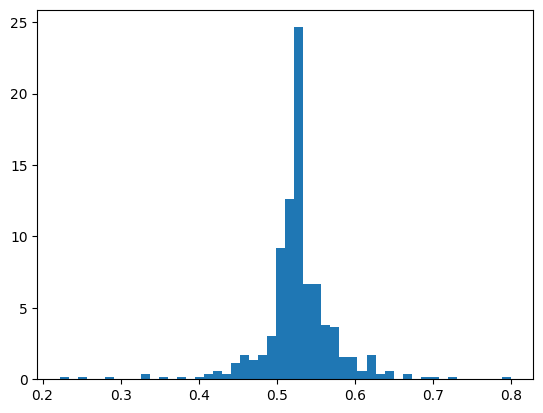

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Reads the score values from CSV
fields=['Name','Score']
df = pd.read_csv('precisionScore.csv', names=fields)
values = df['Score']

# Remove errors
values = values[values!= 0]
values = values[values!= 1]

# Plot on histogram
plt.hist(values, bins=50, density=True)
plt.show()

^^ Generates a grapical representation of how the prediction scores are distributed within the SNP data set.

In [128]:
def topTenConversion(filePath):
    otherHist = pd.read_csv('fiveYearData/'+ filePath)
    addOn = filePath.split("_")[0]

    # Makes the column names based on the current stock
    newDF = pd.DataFrame(columns=['Open'+addOn, 'High'+addOn, 'Low'+addOn, 'Close'+addOn, 'Volume'+addOn])
    newDF.iloc[:,0] = otherHist.open
    newDF.iloc[:,1] = otherHist.high
    newDF.iloc[:,2] = otherHist.low
    newDF.iloc[:,3] = otherHist.close
    newDF.iloc[:,4] = otherHist.volume
    newDF.index = otherHist.date
    return newDF

^^ A specific function which is used for converting the most correlated stocks, this is required since unique column names are needed for each stock. For example we need OpenAMZN, CloseAMZN not just Open, Close due to duplicates.

In [131]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
def calcCombinedFinal():
    fields=['Name','Score']
    df = pd.read_csv('precisionScore.csv', names=fields)

    # Gets the 10 best stocks from the csv 
    bestTen = df.sort_values('Score').tail(12)[:-2]
    combinedDF = pd.DataFrame()

    # Apply conversion method to each and append
    for i in bestTen['Name']:
        temp = topTenConversion(i+'_data.csv')
        combinedDF = pd.concat([combinedDF, temp], axis=1)

    otherHist = combinedDF
    otherHist['Target'] = 0
    predictCols = otherHist.columns[:-1]
    temp = msftHist.copy()
    temp["Target"] = None

    # Generate a target for each
    for i in range(0, len(temp)):
        if(temp.iloc[i].Close > temp.iloc[i].Open):
            temp.iloc[i, 5] = 1.0
        else:
            temp.iloc[i, 5] = 0.0

    otherHist['Target'] = temp['Target']
    otherHist['Target'] = otherHist['Target'].shift(-1)

    # Make and train a model
    model = RandomForestClassifier(n_estimators=1000, random_state=1)
    train = otherHist.iloc[:-100]
    test = otherHist.iloc[-100:]
    model.fit(train[predictCols], train["Target"].astype('int'))
    
    # Use the model to make predictions
    predictions = model.predict(test[predictCols])
    preds = pd.Series(predictions, index = test.index)
    precScore = precision_score(test["Target"].iloc[:-1].astype('int'), preds.iloc[:-1])

    return precScore

^^ Combines the data on the 10 best stocks and then uses that large dataset to predict the change in MSFT value.

In [133]:
calcCombinedFinal()

0.6842105263157895

Overall the result of running the prediction on the 10 most correlated stocks was a result of 0.68 which means that it was predicting with an accuracy of 68%